# PSO Implementation and Results Comparison between My PSOs and PySwarms

* In this notebook, the results of My PSOs and PySwarms are compared for different optimization functions (Rosenbrock, Ackley and Rastrigin).
* For each function, the best parameter configurations are analyzed and the final costs and execution times are compared.
* Convergence plots are generated and stability statistics are analyzed.
* Box plots are generated to visualize the distribution of costs and execution times.
* Scatter plots are generated to compare the final cost and execution time between both methods.


In [2]:
# Importing libraries
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import ast
%matplotlib inline
import re

# Load the CSV results file
df = pd.read_csv('pso_results.csv')
functions = ['ackley', 'rastrigin', 'rosenbrock']
methods = df['method'].unique()
for func in functions:
    func_df = df[df['function'] == func]
    best_results = func_df.sort_values(by='cost').head(5)
    print(f"\nTop 5 configurations for {func}:")
    display(best_results[['method', 'n_particles', 'iters', 'w', 'c1', 'c2', 'dim', 'cost', 'execution_time']])

def extract_floats(x):
    if isinstance(x, str):
        try:
            # Replace "np.float64" and extract the float values
            x_cleaned = re.sub(r'np\.float64\((.*?)\)', r'\1', x)
            return [float(val) for val in ast.literal_eval(x_cleaned)]
        except (ValueError, SyntaxError) as e:
            # Handle the case where conversion fails
            print(f"Error at converting cost_history: {e}, value: {x}")
            return []
    return x if isinstance(x, list) else []

df['cost_history'] = df['cost_history'].apply(extract_floats)



Top 5 configurations for ackley:


,method,n_particles,iters,w,c1,c2,dim,cost,execution_time
2178,pyswarms,10,30,0.8,1.0,1.0,2,0.022249,0.002796
737,pyswarms,5,30,0.8,1.0,1.0,2,0.030115,0.002851
2534,pyswarms,10,30,1.0,1.0,1.0,2,0.068160,0.003008
2179,pyswarms,10,30,0.8,1.0,1.0,2,0.084340,0.002896
4878,openmp,10,10,1.0,0.0,1.5,2,0.091963,0.018010



Top 5 configurations for rastrigin:


,method,n_particles,iters,w,c1,c2,dim,cost,execution_time
8282,async,10,30,1.0,1.0,1.0,2,0.000027,0.038048
8466,async,10,30,1.0,0.0,1.5,2,0.000077,0.042793
5469,openmp,10,30,1.0,1.0,1.5,2,0.000145,0.099836
2403,pyswarms,10,30,0.8,1.5,1.0,2,0.000182,0.002638
5586,openmp,10,30,1.0,0.0,1.5,2,0.000208,0.070947



Top 5 configurations for rosenbrock:


,method,n_particles,iters,w,c1,c2,dim,cost,execution_time
4041,openmp,5,30,1.0,1.0,1.5,2,0.000116,0.020945
741,pyswarms,5,30,0.8,1.0,1.0,2,0.000271,0.002557
2425,pyswarms,10,30,0.8,1.5,1.0,2,0.021256,0.002695
2181,pyswarms,10,30,0.8,1.0,1.0,2,0.027162,0.002532
2362,pyswarms,10,30,0.8,0.0,1.5,2,0.031568,0.002751


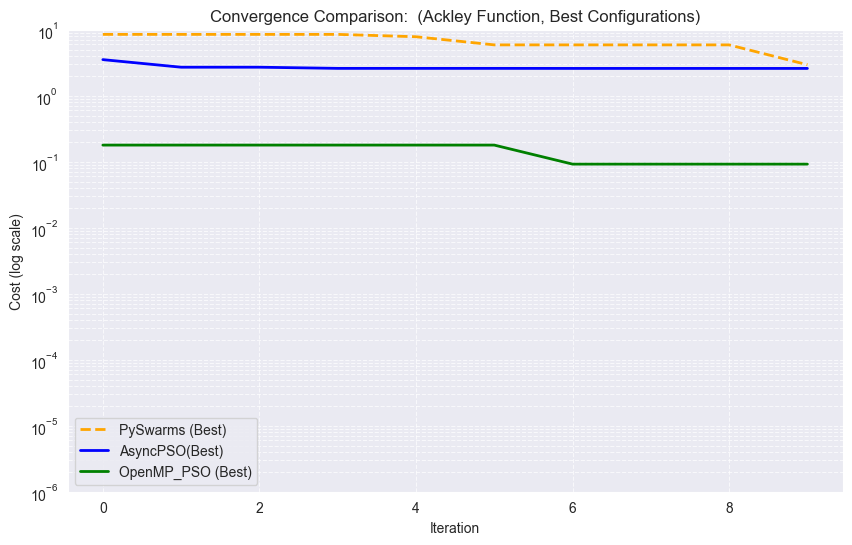

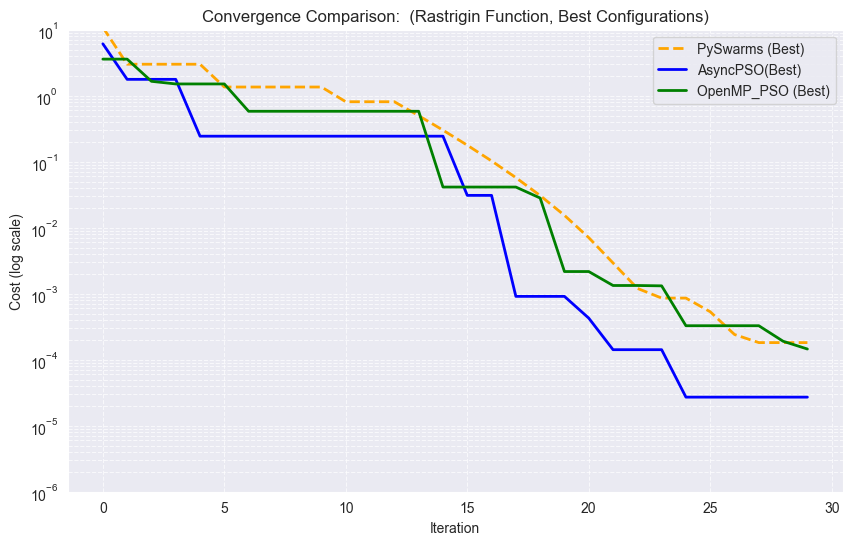

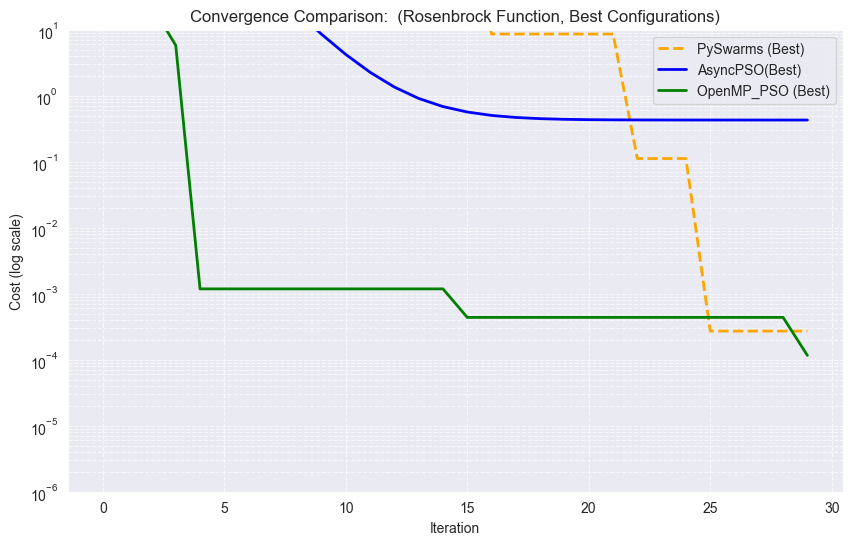

In [3]:
# Plotting convergence comparison for the best configurations
# Obtaining function names
for func in functions:
    # Filter the DataFrame for the current function and get the best configurations
    func_df = df[df['function'] == func]
    best_async = func_df[func_df['method'] == 'async'].sort_values(by='cost').iloc[0]
    best_pyswarms = func_df[func_df['method'] == 'pyswarms'].sort_values(by='cost').iloc[0]
    best_openmp = func_df[func_df['method'] == 'openmp'].sort_values(by='cost').iloc[0]

    # Set the cost history for both methods
    min_length = min(len(best_async['cost_history']),len(best_pyswarms['cost_history']), len(best_openmp['cost_history']))
    my_async_history = best_async['cost_history'][:min_length]
    my_openmp_history = best_openmp['cost_history'][:min_length]
    pyswarms_history = best_pyswarms['cost_history'][:min_length]

    # Plotting the convergence comparison
    plt.figure(figsize=(10, 6))
    plt.plot(pyswarms_history, label='PySwarms (Best)', linestyle='--', color='orange', linewidth=2)
    plt.plot(my_async_history, label='AsyncPSO(Best)', linestyle='-', color='blue', linewidth=2)
    plt.plot(my_openmp_history, label='OpenMP_PSO (Best)', linestyle='-', color='green', linewidth=2)

    plt.yscale('log')
    plt.ylim(1e-6, 10)
    plt.xlabel('Iteration')
    plt.ylabel('Cost (log scale)')
    plt.title(f'Convergence Comparison:  ({func.capitalize()} Function, Best Configurations)')
    plt.grid(True, which="both", linestyle="--", alpha=0.7)
    plt.legend()
    plt.show()

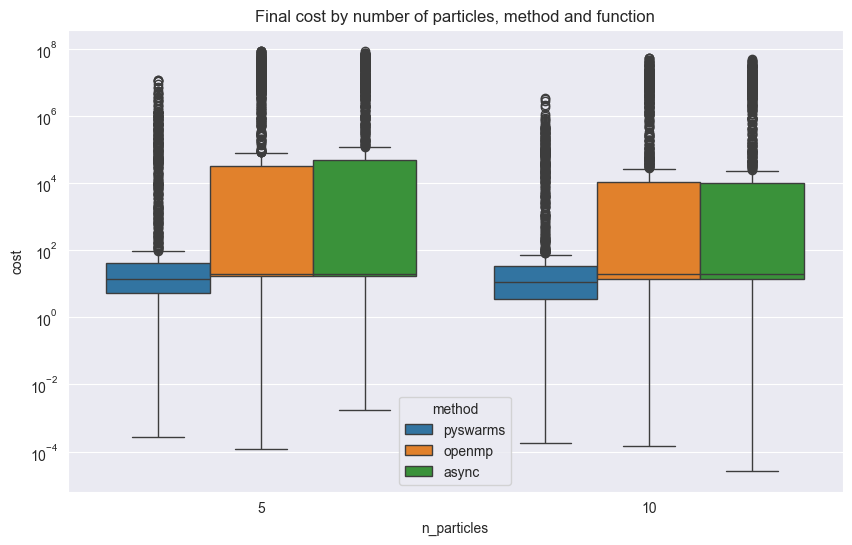

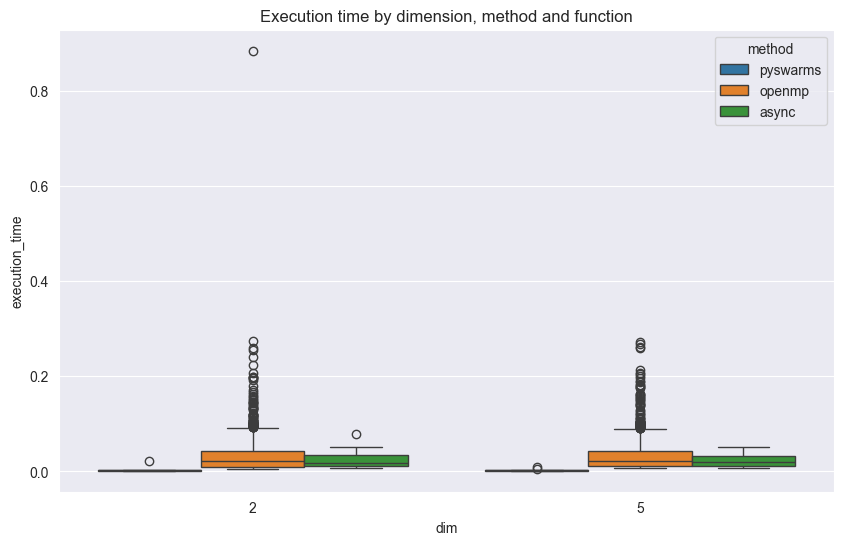

In [4]:
import seaborn as sns
# Boxplot for cost and execution time of the different methods (My PSO and PySwarms)
plt.figure(figsize=(10, 6))
sns.boxplot(x='n_particles', y='cost', hue='method', data=df)
plt.yscale('log')
plt.title('Final cost by number of particles, method and function')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='dim', y='execution_time', hue='method', data=df)
plt.title('Execution time by dimension, method and function')
plt.show()